## PhD Survey: Results administrative processes

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

from scipy.stats import mannwhitneyu, t

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Define plotting helper function
def initialize_plot(ax):
    for pos in ('top', 'right', 'bottom', 'left'):
        ax.spines[pos].set_visible(False)

    ax.set_facecolor('ghostwhite')
    ax.grid(axis='y', color='lightgrey', linewidth=1)
    ax.set_axisbelow(True)

In [4]:
# Set plotting variables
COLOR = "darkorange"
FIGURES = "figures/administration/"

if not os.path.exists(FIGURES):
    os.makedirs(FIGURES)

### Read clean data

In [5]:
# data = pd.read_csv("phd-survey-data-clean.csv", sep=";")
data = pd.read_csv("mock-data.csv", sep=";")

### Administrative processes

In [6]:
def compute_CI(d, cl=0.95):
    ci = t.interval(cl, df=len(d)-1, loc=np.mean(d), scale=np.std(d, ddof=1) / np.sqrt(len(d)))
    return ci

In [7]:
means_local = []
CIs_local = []
medians_local = []

means_int = []
CIs_int = []
medians_int = []

for var in ('familiar_curriculum', 'familiar_statutes', 'info_access_online', 'interest_classes', 'onboarding'):
    means_local.append(data[data.nationality_new != "International"][var].mean())
    means_int.append(data[data.nationality_new == "International"][var].mean())

    CIs_local.append(compute_CI(data[data.nationality_new != "International"][var]))
    CIs_int.append(compute_CI(data[data.nationality_new == "International"][var]))

    medians_local.append(data[data.nationality_new != "International"][var].median())
    medians_int.append(data[data.nationality_new == "International"][var].median())

In [8]:
data[['familiar_curriculum', 'familiar_statutes', 'info_access_online', 'interest_classes', 'onboarding']].mean()

familiar_curriculum    2.51
familiar_statutes      2.57
info_access_online     2.46
interest_classes       2.61
onboarding             2.19
dtype: float64

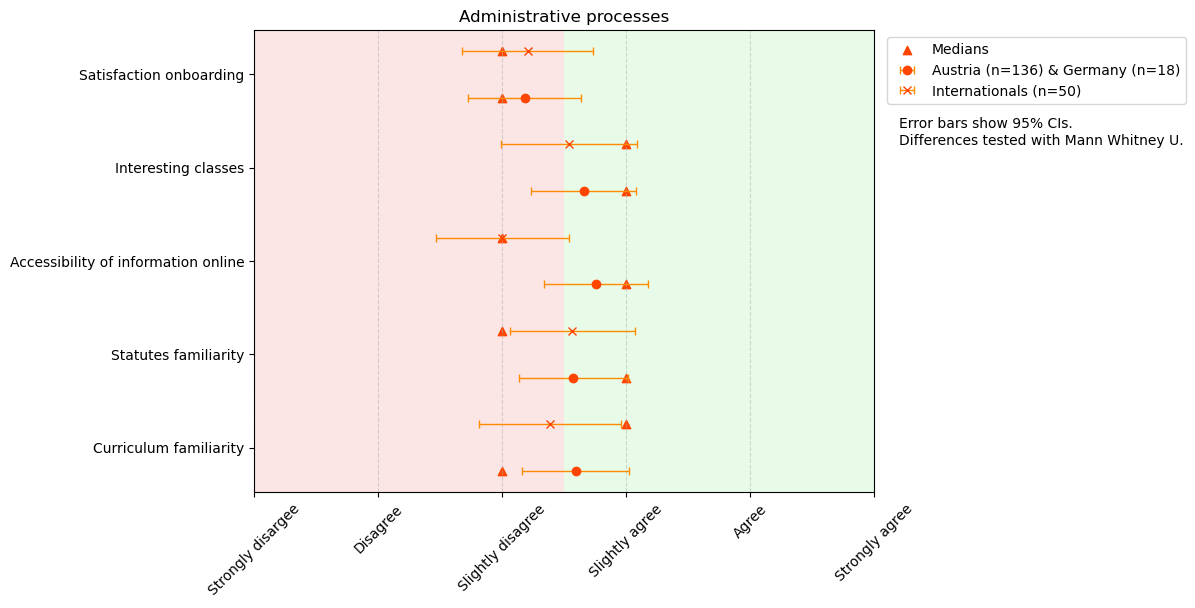

In [9]:
# Plot setup
fig, ax = plt.subplots(figsize=(8, 6))

plt.axvspan(0, 2.5, facecolor='lightcoral', alpha=0.2)
plt.axvspan(2.5, 5, facecolor='lightgreen', alpha=0.2)

# Plot horizontal error bars (mean ± std)
ax.errorbar(means_local, np.arange(len(means_local)*2, step=2), xerr=[[mean - ci[0] for mean, ci in zip(means_local, CIs_local)],
                                                                      [ci[1] - mean for mean, ci in zip(means_local, CIs_local)]], 
            fmt='o', color='orangered', ecolor=COLOR, capsize=3, linewidth=1, label="Austria (n=136) & Germany (n=18)")

ax.errorbar(means_int, np.arange(1, len(means_int)*2+1, step=2), xerr=[[mean - ci[0] for mean, ci in zip(means_int, CIs_int)],
                                                                      [ci[1] - mean for mean, ci in zip(means_int, CIs_int)]], 
            fmt='x', color='orangered', ecolor=COLOR, capsize=3, linewidth=1, label="Internationals (n=50)")

ax.scatter(medians_local, [0, 2, 4, 6, 8], marker='^', color='orangered', label='Medians')
ax.scatter(medians_int, [1, 3, 5, 7, 9], marker='^', color='orangered')

ax.set_yticks(np.arange(0.5, 9, step=2))
ax.set_yticklabels(["Curriculum familiarity", 
                    "Statutes familiarity",
                    "Accessibility of information online",
                    "Interesting classes",
                    "Satisfaction onboarding"])
ax.set_xticklabels(["Strongly disargee", 
                    "Disagree",
                    "Slightly disagree",
                    "Slightly agree",
                    "Agree",
                    "Strongly agree"],
                    rotation=45, ha='center')

ax.text(5.2, 7, "Error bars show 95% CIs.\nDifferences tested with Mann Whitney U.", color="black", fontsize=10)

ax.set_title("Administrative processes")
ax.set_xlim(0, 5)
ax.grid(True, axis='x', linestyle='--', alpha=0.5)
ax.legend(bbox_to_anchor=(1.01, 1))

fig.savefig(FIGURES + "administrative-processes.jpeg", dpi=300, bbox_inches='tight')

In [10]:
mannwhitneyu(data[data.nationality_new == "International"].familiar_curriculum,
             data[data.nationality_new != "International"].familiar_curriculum)

MannwhitneyuResult(statistic=np.float64(1117.0), pvalue=np.float64(0.6054531861969158))

In [11]:
mannwhitneyu(data[data.nationality_new == "International"].familiar_statutes,
             data[data.nationality_new != "International"].familiar_statutes)

MannwhitneyuResult(statistic=np.float64(1176.5), pvalue=np.float64(0.9283020629955137))

In [12]:
mannwhitneyu(data[data.nationality_new == "International"].info_access_online,
             data[data.nationality_new != "International"].info_access_online)

MannwhitneyuResult(statistic=np.float64(880.5), pvalue=np.float64(0.026733063930164266))

In [13]:
mannwhitneyu(data[data.nationality_new == "International"].interest_classes,
             data[data.nationality_new != "International"].interest_classes)

MannwhitneyuResult(statistic=np.float64(1148.5), pvalue=np.float64(0.7714615792660381))

In [14]:
mannwhitneyu(data[data.nationality_new == "International"].onboarding,
             data[data.nationality_new != "International"].onboarding)

MannwhitneyuResult(statistic=np.float64(1208.5), pvalue=np.float64(0.8943200246991851))

### Onboarding process (free text)

In [15]:
# Print free text feedback on onboarding process
print("ONBOARDING PROCESS")
for i, feedback in enumerate(data.onboarding_free_text.dropna()):
    print(i, feedback)

ONBOARDING PROCESS
0 Lorem ipsum.
1 Lorem ipsum.
2 Lorem ipsum.
3 Lorem ipsum.
4 Lorem ipsum.
5 Lorem ipsum.
6 Lorem ipsum.
7 Lorem ipsum.
8 Lorem ipsum.
9 Lorem ipsum.
10 Lorem ipsum.
11 Lorem ipsum.
12 Lorem ipsum.
13 Lorem ipsum.
14 Lorem ipsum.
15 Lorem ipsum.
16 Lorem ipsum.
17 Lorem ipsum.
18 Lorem ipsum.
19 Lorem ipsum.
20 Lorem ipsum.
21 Lorem ipsum.
22 Lorem ipsum.
23 Lorem ipsum.
24 Lorem ipsum.
25 Lorem ipsum.
26 Lorem ipsum.
27 Lorem ipsum.
28 Lorem ipsum.
29 Lorem ipsum.
30 Lorem ipsum.
31 Lorem ipsum.
32 Lorem ipsum.
33 Lorem ipsum.
34 Lorem ipsum.
35 Lorem ipsum.
36 Lorem ipsum.
37 Lorem ipsum.
38 Lorem ipsum.
39 Lorem ipsum.
40 Lorem ipsum.
41 Lorem ipsum.
42 Lorem ipsum.
43 Lorem ipsum.
44 Lorem ipsum.
45 Lorem ipsum.
46 Lorem ipsum.
47 Lorem ipsum.
48 Lorem ipsum.
49 Lorem ipsum.
50 Lorem ipsum.
51 Lorem ipsum.
52 Lorem ipsum.
53 Lorem ipsum.
54 Lorem ipsum.
55 Lorem ipsum.
56 Lorem ipsum.
57 Lorem ipsum.
58 Lorem ipsum.
59 Lorem ipsum.
60 Lorem ipsum.
61 Lorem ipsum.

### Educational agreement, Mentoring, Institutions

In [16]:
# Print educational agreement, mentoring, institutions summary statistics
print("EDUCATIONAL AGREEMENT")
for ea in dict(data.ed_agree_YN.value_counts()).keys():
    print(f"{ea}: {dict(data.ed_agree_YN.value_counts())[ea]}, {dict(data.ed_agree_YN.value_counts())[ea]/len(data):.2f}")

print("---")

print("MENTORING")
for m in dict(data.mentor_YN.value_counts()).keys():
    print(f"{m}: {dict(data.mentor_YN.value_counts())[m]}, {dict(data.mentor_YN.value_counts())[m]/len(data):.2f}")

print("---")

institutions = ["registrars_office", "deans_office", "docschool", "phd_office", "international_office", 
                "welcome_center", "phd_union", "staff_development", "ft_house", "service_non_above"]
inst_yes = []

# Count "yes" per instition and sort ascendingly
for inst in institutions:
    inst_yes.append(data[inst].to_list().count('Yes'))

inst_yes_sorted, institutions_sorted = zip(*sorted(zip(inst_yes, institutions)))

print("AWARENESS SERVICES BY INSTITUTION")
for i in range(len(institutions_sorted)):
    print(f"{institutions_sorted[i]}: {inst_yes_sorted[i]}, {inst_yes_sorted[i]/len(data):.2f}")

EDUCATIONAL AGREEMENT
Yes more than one year: 25, 0.25
No unaware existence: 19, 0.19
Yes year one: 18, 0.18
No unaware graduation: 17, 0.17
No year one: 14, 0.14
No missing signature: 7, 0.07
---
MENTORING
No unaware possibility: 24, 0.24
No unaware definition: 22, 0.22
Yes: 21, 0.21
No need: 17, 0.17
No conflict supervisor: 16, 0.16
---
AWARENESS SERVICES BY INSTITUTION
staff_development: 45, 0.45
docschool: 46, 0.46
phd_union: 46, 0.46
ft_house: 48, 0.48
registrars_office: 49, 0.49
international_office: 50, 0.50
phd_office: 54, 0.54
service_non_above: 55, 0.55
welcome_center: 56, 0.56
deans_office: 62, 0.62


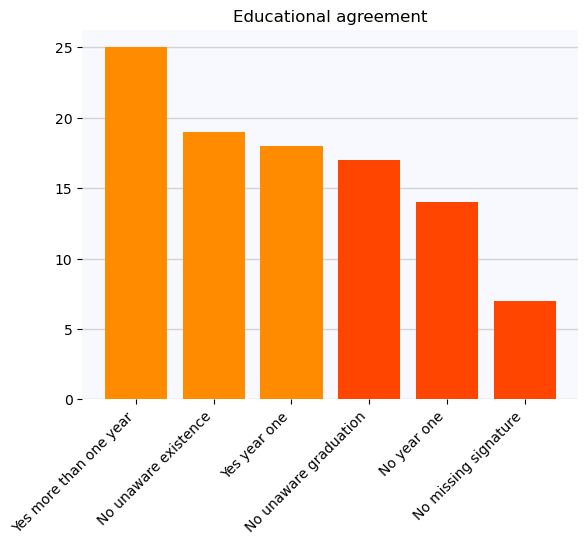

In [17]:
# Plot educational agreement
fig, ax = plt.subplots()
initialize_plot(ax)

ax.bar(dict(data.ed_agree_YN.value_counts()).keys(), dict(data.ed_agree_YN.value_counts()).values(), color=3*[COLOR]+3*['orangered'])
ax.set_xticklabels(dict(data.ed_agree_YN.value_counts()).keys(), rotation=45, ha='right')
ax.set_title("Educational agreement")
# ax.text(2.9, 9, "2%", color="orangered", fontsize=10)
# ax.text(3.9, 7, "1%", color="orangered", fontsize=10)
# ax.text(4.9, 7, "1%", color="orangered", fontsize=10)

fig.savefig(FIGURES + "educational-agreement.jpeg", dpi=300, bbox_inches='tight')

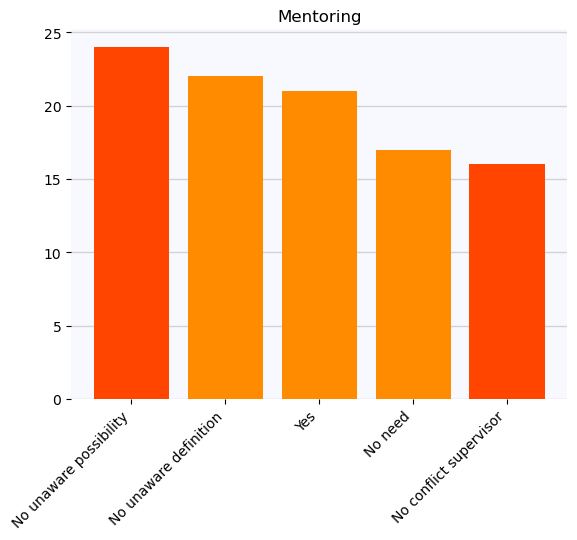

In [18]:
# Plot mentoring
fig, ax = plt.subplots()
initialize_plot(ax)

ax.bar(dict(data.mentor_YN.value_counts()).keys(), dict(data.mentor_YN.value_counts()).values(),
       color=['orangered', COLOR, COLOR, COLOR, 'orangered'])
ax.set_xticklabels(dict(data.mentor_YN.value_counts()).keys(), rotation=45, ha='right')
ax.set_title("Mentoring")
# ax.text(-0.15, 34, "35%", color="white", fontsize=10)
# ax.text(0.85, 34, "30%", color="white", fontsize=10)
# ax.text(1.85, 14, "14%", color="white", fontsize=10)
# ax.text(2.85, 14, "12%", color="white", fontsize=10)
# ax.text(3.88, 9, "9%", color="white", fontsize=10)

fig.savefig(FIGURES + "mentoring.jpeg", dpi=300, bbox_inches='tight')

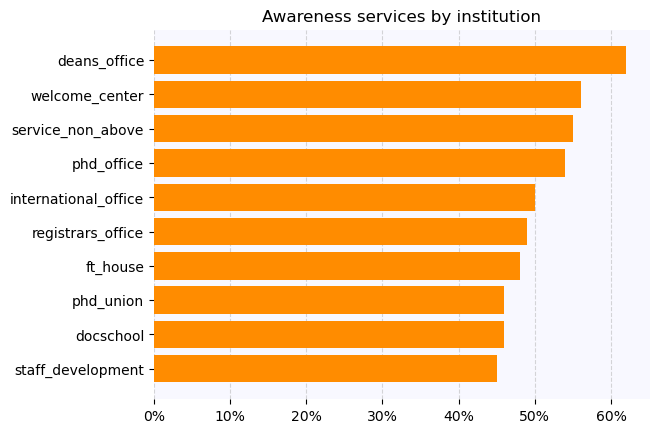

In [19]:
# Plot awareness service by institution
fig, ax = plt.subplots()
initialize_plot(ax)

ax.barh(institutions_sorted, np.array(inst_yes_sorted)/len(data)*100, color=COLOR)
ax.grid(True, axis='x', linestyle='--', alpha=0.5)
ax.grid(False, axis='y')
ax.set_title("Awareness services by institution")

ax.xaxis.set_major_formatter(mtick.PercentFormatter())

fig.savefig(FIGURES + "service-awareness.jpeg", dpi=300, bbox_inches='tight')